<a href="https://colab.research.google.com/github/sozkaynak/Machine-Learning-with-Python/blob/master/LogisticRegressionIrisDatasetMrmr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skfeature.function.information_theoretical_based.MRMR import mrmr
from sklearn import datasets
from sklearn.cross_validation import train_test_split



/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
"""from google.colab import files
uploaded = files.upload()"""

In [0]:
iris= datasets.load_iris()
X = iris.data[:,:] 
y = iris.target

In [12]:
k=X.shape[1]
print(k)
kSet=list(range(1,k+1))
print(kSet)
r2_scoreSet=[]
for i in kSet:
  kwargs_u={"n_selected_features":i}
  X1= mrmr(X,y, **kwargs_u)
  X2=X1[0][:][:]
  x=iris.data[:,X2]
  
  from sklearn.model_selection import train_test_split
  x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)
  
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(x_train)
  X_test = sc.transform(x_test)
  
  from sklearn.linear_model import LogisticRegression
  logr = LogisticRegression(random_state=0)
  logr.fit(X_train,y_train)
  
  #Tahmin
  y_pred = logr.predict(X_test)
  #print(y_pred)
  #print(y_test)
  
  #for Visualization
  from sklearn.metrics import r2_score
  r2=r2_score(y_test, y_pred)
  """print("kwargs_u:",kwargs_u,"için r2_score:",r2)"""
  r2_scoreSet.append(r2)

  
 

4
[1, 2, 3, 4]


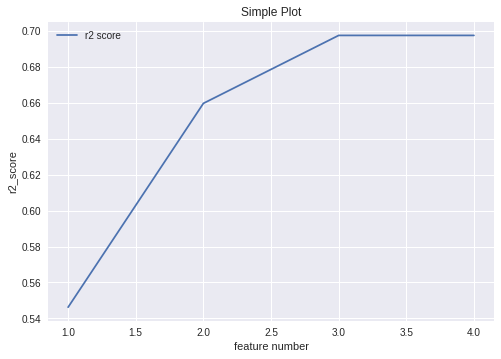

In [13]:
plt.plot(kSet, r2_scoreSet, label='r2 score')
plt.xlabel('feature number')
plt.ylabel('r2_score')
plt.title("Simple Plot")
plt.legend()
plt.show()